<a href="https://colab.research.google.com/github/N335HMAVA5UD3V/credit_card_fraud-prediction/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD**

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,auc

load dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA SETS/card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
print(X)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [ ]:
print(y)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64


In [ ]:
df['fraud'].unique()

array([0., 1.])

In [ ]:
df.value_counts(df['fraud'])

fraud
0.0    912597
1.0     87403
dtype: int64

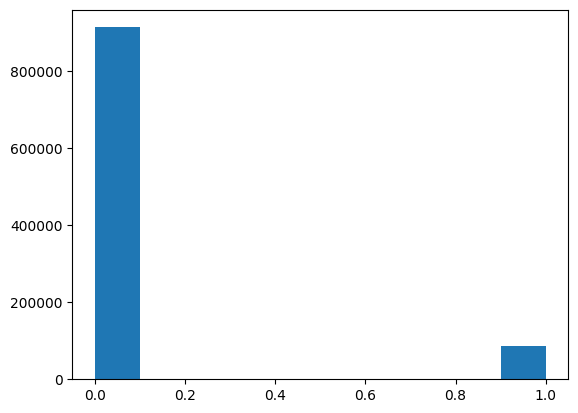

In [ ]:
plt.hist(df['fraud'])
plt.show()

number of fraud and not fraud are different . So I use under sampling to avoid long runtime

In [ ]:
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [ ]:
y_us.value_counts()

0.0    87403
1.0    87403
Name: fraud, dtype: int64

In [ ]:
mms=MinMaxScaler()
X_us_scaled=mms.fit_transform(X_us)
X_us_scaled

array([[9.75649183e-04, 8.83446337e-05, 6.95315948e-03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.51512488e-04, 2.78589951e-04, 5.06320048e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.89882476e-05, 7.41350838e-03, 1.21378450e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.17200692e-02, 1.93353937e-06, 1.59026572e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.83308645e-03, 1.54277336e-03, 1.11672559e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.47663868e-03, 8.43901109e-04, 4.10776475e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_us_scaled,y_us,random_state=1,test_size=0.3)

Trying different models

In [ ]:
knn=KNeighborsClassifier()
nb=GaussianNB()
rf=RandomForestClassifier(random_state=1)
ad=AdaBoostClassifier()
xgb=XGBClassifier()
models=[knn,nb,rf,ad,xgb]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     26411
         1.0       0.99      1.00      1.00     26031

    accuracy                           1.00     52442
   macro avg       1.00      1.00      1.00     52442
weighted avg       1.00      1.00      1.00     52442

GaussianNB()
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     26411
         1.0       0.85      0.96      0.90     26031

    accuracy                           0.90     52442
   macro avg       0.90      0.90      0.90     52442
weighted avg       0.91      0.90      0.90     52442

RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26411
         1.0       1.00      1.00      1.00     26031

    accuracy                           1.00     52442
   macro avg       1.00      1.00      1.00     52442

# I use adaboost as the best model

In [ ]:
mms1=MinMaxScaler()
mms1.fit(X_us)
ad1=AdaBoostClassifier()
ad1.fit(X_train,y_train)
y_pred1=ad1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26411
         1.0       1.00      1.00      1.00     26031

    accuracy                           1.00     52442
   macro avg       1.00      1.00      1.00     52442
weighted avg       1.00      1.00      1.00     52442



In [ ]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[26407,     4],
       [   23, 26008]])

Text(50.722222222222214, 0.5, 'True label')

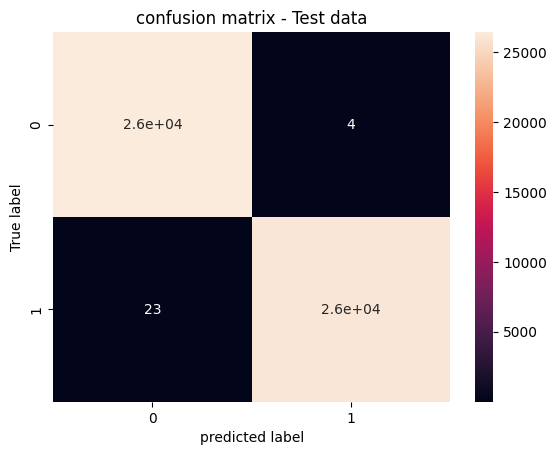

In [ ]:
sns.heatmap(cm,annot=True)
plt.title('confusion matrix - Test data')
plt.xlabel('predicted label')
plt.ylabel('True label')

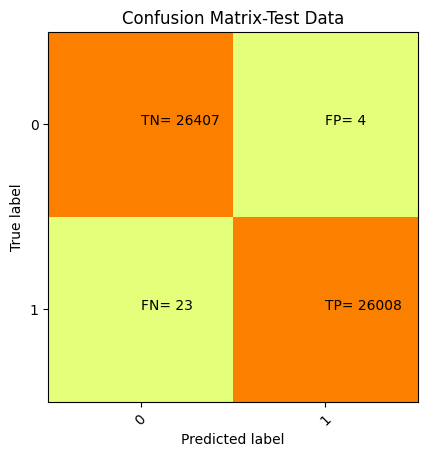

In [ ]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

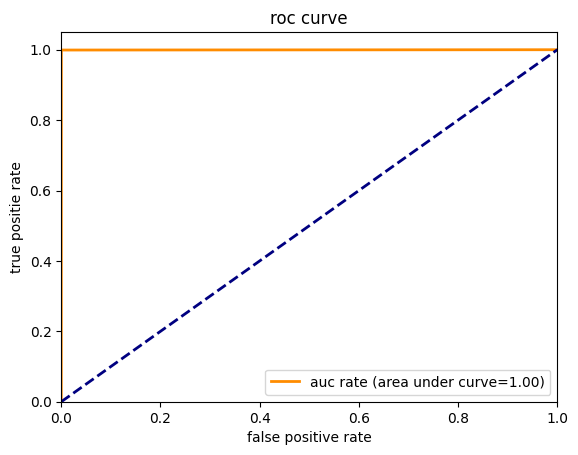

In [ ]:
fpr_kn,tpr_kn,treshold=roc_curve(y_test,y_pred1)
auc_kn=auc(fpr_kn,tpr_kn)
plt.figure()
plt.plot(fpr_kn,tpr_kn,color='darkorange',lw=2,label='auc rate (area under curve=%.2f)'%auc_kn)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positie rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
filename='credit_card_fraud.sav'
pickle.dump(ad1,open(filename,'wb'))


In [ ]:
pickle.dump(mms1,open('ad1.sav','wb'))